# Часть 1: ML workflow

В этой части занятия мы познакомимся с базовым процессом решения задачи машинного обучения. Мы пройдем путь от загрузки данных до обучения модели и тестирования.

Задача, которую мы будем решать: задача предсказания сердечно-сосудистых заболеваний у людей. Ссылка на датасет: https://disk.yandex.ru/d/8CNIk7GdkBop2A

## Скачивание данных

In [ ]:
! wget "https://s486man.storage.yandex.net/rdisk/524cdd2fdc1d5d74283d090e2f7ec9987fd3a07da0391ea4c48541927bfc7009/612a8015/aZ8Akc9CqtcaAMvg9MkExaj2PXssqnFQLYpC1XoxdZyZ-UwfCx4HE_T6riPsgGNMZw62iGEx3DpUVka808Xj_A==?uid=316082386&filename=ssz_data_manual.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=821415&hid=0dda87ddf63d38e0cd3d6c03cfc27dd9&media_type=compressed&tknv=v2&etag=a9d77ccc420596c959e8c4fd827e7a1e&rtoken=kuzkOANveJYm&force_default=yes&ycrid=na-39802b6009f6e13a431625ac66ca51e0-downloader2f&ts=5caa2c0e06f40&s=36dbcfa0f5122c8319dfea62c2389797e00f4fe8b6bd2912779bce2e8e206602&pb=U2FsdGVkX18CQg-3f3w9xmOxkRX-btfb21nqLI0lNyAUJs3Fp-HSCcfXxx3ZKwJ_151yVtmqtTtE7dribRKd1JXDfzWcUPun5XH_HEplpFg" -O data.zip

--2021-08-28 14:45:35--  https://s486man.storage.yandex.net/rdisk/524cdd2fdc1d5d74283d090e2f7ec9987fd3a07da0391ea4c48541927bfc7009/612a8015/aZ8Akc9CqtcaAMvg9MkExaj2PXssqnFQLYpC1XoxdZyZ-UwfCx4HE_T6riPsgGNMZw62iGEx3DpUVka808Xj_A==?uid=316082386&filename=ssz_data_manual.zip&disposition=attachment&hash=&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=821415&hid=0dda87ddf63d38e0cd3d6c03cfc27dd9&media_type=compressed&tknv=v2&etag=a9d77ccc420596c959e8c4fd827e7a1e&rtoken=kuzkOANveJYm&force_default=yes&ycrid=na-39802b6009f6e13a431625ac66ca51e0-downloader2f&ts=5caa2c0e06f40&s=36dbcfa0f5122c8319dfea62c2389797e00f4fe8b6bd2912779bce2e8e206602&pb=U2FsdGVkX18CQg-3f3w9xmOxkRX-btfb21nqLI0lNyAUJs3Fp-HSCcfXxx3ZKwJ_151yVtmqtTtE7dribRKd1JXDfzWcUPun5XH_HEplpFg
Resolving s486man.storage.yandex.net (s486man.storage.yandex.net)... 37.140.143.11, 2a02:6b8:c01:14:0:41af:b98:ae5b
Connecting to s486man.storage.yandex.net (s486man.storage.yandex.net)|37.140.143.11|:443... connected.
HTTP request se

In [ ]:
! unzip data.zip

Archive:  data.zip
   creating: ssz_data/
  inflating: ssz_data/test.csv       
  inflating: ssz_data/train.csv      



Заметим, что данные уже разбиты на тренировочные и тестовые.

## Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("ssz_data/train.csv")
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58036,18387,2,175,75.0,110,70,1,1,0,0,1,1
1,88981,23328,2,155,66.0,140,90,1,1,1,1,0,0
2,74325,17602,2,168,73.0,120,80,2,1,0,0,1,0
3,16519,23432,2,183,95.0,140,90,1,1,0,0,0,1
4,28981,23162,1,156,62.0,150,80,1,1,0,0,1,1


In [ ]:
test_data = pd.read_csv("ssz_data/test.csv")
test_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,36043,17646,2,165,65.0,120,80,1,1,0,0,0,1
1,44455,20418,1,161,77.0,120,70,1,1,0,0,1,1
2,61323,20347,1,165,88.0,120,80,2,2,0,0,1,1
3,27780,18086,2,170,91.0,120,80,3,3,0,0,1,1
4,54273,21791,1,158,67.0,130,80,1,1,0,0,1,1


Видим, что, как и должно быть, тестовые данные содержат все слолбцы, что есть в тренировочных данных, кроме столбца с целевой переменной — "cardio". Целевая переменная принимает значения 0 или 1. 0 значит, что у человека нет ССЗ, 1 — что есть. 

Таким образом, наша задача — задача бинарной классификации.

Давайте посмотрим на информацию о признаках в данных:

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58000 entries, 0 to 57999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           58000 non-null  int64  
 1   age          58000 non-null  int64  
 2   gender       58000 non-null  int64  
 3   height       58000 non-null  int64  
 4   weight       58000 non-null  float64
 5   ap_hi        58000 non-null  int64  
 6   ap_lo        58000 non-null  int64  
 7   cholesterol  58000 non-null  int64  
 8   gluc         58000 non-null  int64  
 9   smoke        58000 non-null  int64  
 10  alco         58000 non-null  int64  
 11  active       58000 non-null  int64  
 12  cardio       58000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.8 MB


Видим, что в данных нет пропусков и что все данные представлены в числовом виде. На таких данных можно обучать модель машинного обучения. Конечно, в реальных задачах перед этапом обучения моделей есть еще этап предобработки данных — и этот этап занимает бóльшую часть времени дата саентиста. Но об это мы поговорим в следующей части нашего занятия. Пока давайте просто научимся обучать и тестировать модели машинного обучения.

Поделим тренировочные данные на признаки и целевую переменную. Это нужно, потому что на вход моделям машинного обучения признаки и целевая переменная подаются отдельно.

In [ ]:
X_train = train_data.drop(columns=['cardio'])
y_train = train_data['cardio']

То же самое для текстовых данных:

In [ ]:
X_test = test_data.drop(columns=['cardio'])
y_test = test_data['cardio']

## Обучение моделей

Обучим две модели машинного обучения: логистическую регрессию и случайный лес.

### Логистическая регрессия

Документация: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# импортируем логрегрессию из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

Заводим экземпляр класса нашей модели:

In [ ]:
logreg = LogisticRegression()

Чтобы обучить модель, нужно вызвать у нее функцию fit (в переводе с английского — "обучиться", "подстроиться"). В fit нужно передать два аргумента: тренировочные данные и ответы к тренировочным данным. Именно потому что модели из sklearn для обучения принимают признаки и целевую переменную в разных аргументах, мы выше делили train_data на две переменные X_train и y_train.

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Все! Теперь в переменной logreg у нас лежит обученная модель, которая может давать предсказания на новые данные. Ничего больше для обучения модели делать не нужно: вся магия, о которой вы слышали на теоретических занятиях, происходит внутри библиотеки sklearn. Ничего руками обучать не нужно.

Давайте попросим у обученной логистической регрессии ответы на тестовые данные: для этого нужно вызвать функцию predict (с английского — "предскажи"), и передать ей тестовые данные (без ответов, разумеется! Ведь мы же хотим, чтобы логрегрессия предсказала нам эти ответы =)

In [ ]:
y_predicted_logreg = logreg.predict(X_test)

In [ ]:
y_predicted_logreg

array([0, 1, 1, ..., 0, 1, 1])

Как видим, в переменной y_predicted_logreg теперь находятся ответы на каждцю строчку тестовых данных. Давайте выведем первые 10 ответов модели и первые 10 правильных ответов:

In [ ]:
y_predicted_logreg[:10]

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
np.array(y_test)[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Видим, что в некоторых случаях наша модель ошиблась, а в некоторых дала правильный ответ. Прежде чем выяснять, что же с этим делать, давайте обучим на наших данных еще одну модель машинного обучения:

### Случайный лес

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# импортируем случайный лес из библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

Случайный лес — модель, совершенно идейно отличающаяся от логистической регрессии. Логрегрессия строит разделяющую плоскость, а случайный лес — много решающих деревьев с решающими правилами. Но при этом процесс обучения этих двух моделей (и многих других моделей из sklearn) в коде — совершенно одинаков. Для случайного леса, как и для логрегрессии, нужно:
- завести экземпляр класса
- вызвать функцию fit, передав ей в качестве аргументов тренировочные данные и ответы на них
- для получения предсказаний вызвать функцию predict, передав ей в качестве аргумента данные, на которые хочется получить предсказания.

То, что в sklearn процесс обучения и получения предсказаний для всех моделей машинного обучения одинаков — это очень удобно. Тот же самый проуесс будет и для других моделей: SVM, KNN, многих других. 

Итак, заведем экземпляр класса Random Forest:

Заметим, что у RandomForest есть много разных параметров, которые можно задать: количество деревьев в лесу, максимальная глубина каждого дерева и т.д. (полный список параметров и их описания читайте в документации sklearn, ссылка была выше). 

Не обязательно задавать все параметры: у них есть значения по умолчанию, которые применятся, если вы их не зададите. Давайте ради интереса зададим два параметра: количество деревьев, которые будет обучать (n_estimators) — пусть их будет 20; и максимальную глубину каждого дерева (max_depth) — пусть она будет 10.

In [ ]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10)

Обучим:

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Получим предсказания на тесте:

In [ ]:
y_predicted_rf = rf.predict(X_test)

In [ ]:
y_predicted_rf[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
np.array(y_test)[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

Опять видим, что наш случайный лес где-то выдает правильные ответы, а где-то ошибается. 

Но как понять, какая из моделей — logreg или random forest — лучше? Для этого существуют **метрики качества** — функции, которые оценивают, насколько хорошие модель выдала предсказания. Давайте посчитаем метрики качества для наших двух моделей:

## Метрики качества

Чтобы оценить, насколько одна модель работает лучше, чем другая, посчитаем для ответов моделей на тестовой выборки метрики качества.

Начнем с довольно простой метрики: **Accuracy** 

#### Accuracy

Accuracy — это доля правильно угаданных ответов. Документация: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_predicted_logreg, y_test)

0.6923333333333334

In [ ]:
accuracy_score(y_predicted_rf, y_test)

0.732

Видим, что с точки зрения Accuracy модель случайного леса работает лучше, чем модель линейной регрессии.

#### F1

F1 — другая метрика качества бинарной классификации, используемая в машинном обучении. Документация: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_predicted_logreg, y_test)

0.6837416481069042

In [ ]:
f1_score(y_predicted_rf, y_test)

0.7206878582595103

Видим, что с точки зрения F1 модель случайного леса также выдала лучшие предсказания, чем логрегрессия. 

В машинном обучении существует много разных метрик для задач классификации и регрессии. Кроме Accuracy и F1 есть еще, например, logloss, ROC AUC, Precision, Recall, ...

То, какую метрику лучше использовать для оценки работы того или иного алгоритма машинного обучения, зависит от постановки задачи и от данных.

На этом часть с введением в практическое обучение моделей закончено. Мы прошли путь от загрузки данных до обучения моделей машинного обучения на этих данных и получения их предсказания. Наши данные были "чистые", поэтому все было так просто. Обычно с данными приходится повозиться прежде чем на них можно будет обучать модели. Об этом поговорим во второй части урока:

# Часть 2: предобработка данных

В этой части мы будем работать с датасетом цен на дома в Мельбурне: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

## Скачивание данных

In [ ]:
! wget "https://s133vla.storage.yandex.net/rdisk/0b3370df40da3000a4284b55262a4711b74a57bbe96d0040226a321aae312a98/612a7fee/2fSPJ7TzUTY3gHUuUz-Rmt4kS54cvB4xPfYjy4FHwehxzl6LyXI5M6KSBi-csyeQfQcIsv8tWiJYZDw5XBOMTQ==?uid=316082386&filename=melb_data.csv&disposition=attachment&hash=&limit=0&content_type=text%2Fcsv&owner_uid=316082386&fsize=2091239&hid=e3a2e5ee64afb6c3b0750f281fff740a&media_type=spreadsheet&tknv=v2&etag=97951ac7ad9b84596c1ca62319f7ef0d&rtoken=MAtkay9zdwAC&force_default=yes&ycrid=na-8487eac73fb9d43416c720cdd2cb2eca-downloader2f&ts=5caa2be8d5780&s=047b018130b4ff23d41c400ce567a2ef2c72cb58ef96a20b55596fee8f48f0fb&pb=U2FsdGVkX19ctsEu-h6AEIm2orwtJebDQsdv-oOBBK6f8naFk8sjOYiwyIcisEZbZD35x1GDhW1ehe_0rgNSH8MeiZwVVyNpicH-BlX2pt4" -O data.csv

--2021-08-28 15:12:24--  https://s133vla.storage.yandex.net/rdisk/0b3370df40da3000a4284b55262a4711b74a57bbe96d0040226a321aae312a98/612a7fee/2fSPJ7TzUTY3gHUuUz-Rmt4kS54cvB4xPfYjy4FHwehxzl6LyXI5M6KSBi-csyeQfQcIsv8tWiJYZDw5XBOMTQ==?uid=316082386&filename=melb_data.csv&disposition=attachment&hash=&limit=0&content_type=text%2Fcsv&owner_uid=316082386&fsize=2091239&hid=e3a2e5ee64afb6c3b0750f281fff740a&media_type=spreadsheet&tknv=v2&etag=97951ac7ad9b84596c1ca62319f7ef0d&rtoken=MAtkay9zdwAC&force_default=yes&ycrid=na-8487eac73fb9d43416c720cdd2cb2eca-downloader2f&ts=5caa2be8d5780&s=047b018130b4ff23d41c400ce567a2ef2c72cb58ef96a20b55596fee8f48f0fb&pb=U2FsdGVkX19ctsEu-h6AEIm2orwtJebDQsdv-oOBBK6f8naFk8sjOYiwyIcisEZbZD35x1GDhW1ehe_0rgNSH8MeiZwVVyNpicH-BlX2pt4
Resolving s133vla.storage.yandex.net (s133vla.storage.yandex.net)... 77.88.39.23, 2a02:6b8:c0e:737:0:41af:7e8e:cd7c
Connecting to s133vla.storage.yandex.net (s133vla.storage.yandex.net)|77.88.39.23|:443... connected.
HTTP request sent, awaiting 

## Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [ ]:
data = pd.read_csv('./data.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
answer = data['Price']
data = data.drop(columns=['Price'])

##  Деление выборки на train и test

В этом датасете заранее выборка не поделена на train и test. Нужно сделать это самим.

Никогда нельзя осуществлять предобработку данных на всем датасете до деления его на трейн и тест. Это нужно, чтобы избежать любого, даже косвенного использования информации из трейна в тестовом датасете.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, answer, test_size=0.2) # test_size — какая доля данных пойдет в тестовую выборку

Зачем вообще нужен train_test_split: почему нельзя просто разбить выборку на X_train и X_test, взяв 80% первых строк из data в X_train, а остальные оставить на X_test?

Ответ такой: train_test_split делит выборку так, чтобы по каждому признаку и целевой переменной распределения тренировочной части и тестовой части были одинаковы. Чтобы обучающая выборка была "такая же", как тестовая: содержала ту же долю мужчин/женщин и т.п.

Давайте убедимся, что train_test_split делит выборку на train и test так, чтобы распределения были одинаковы: построим гистограммы признаков.

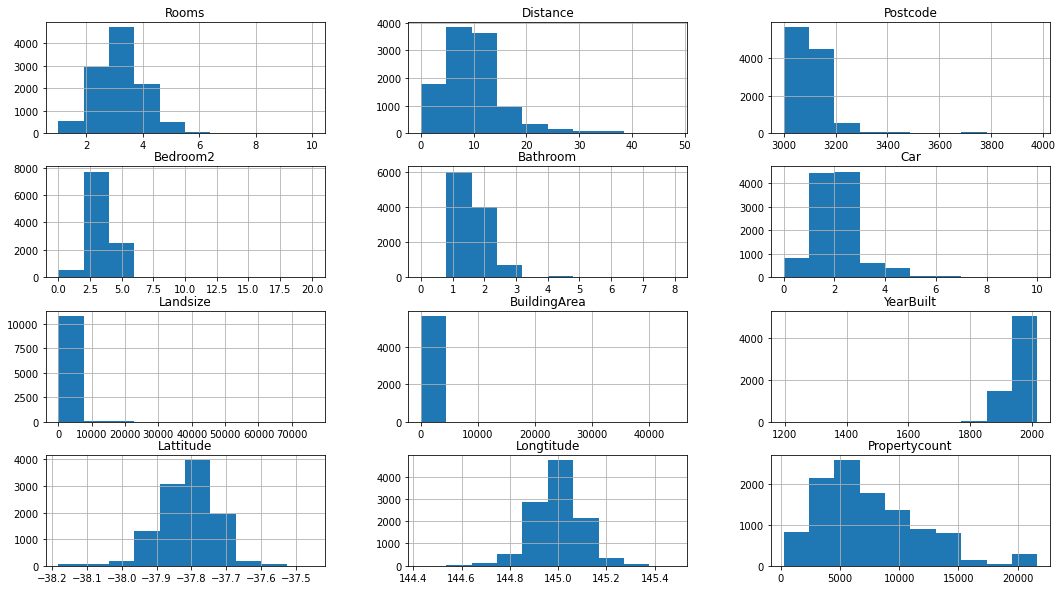

In [ ]:
X_train.hist(figsize=(18, 10));

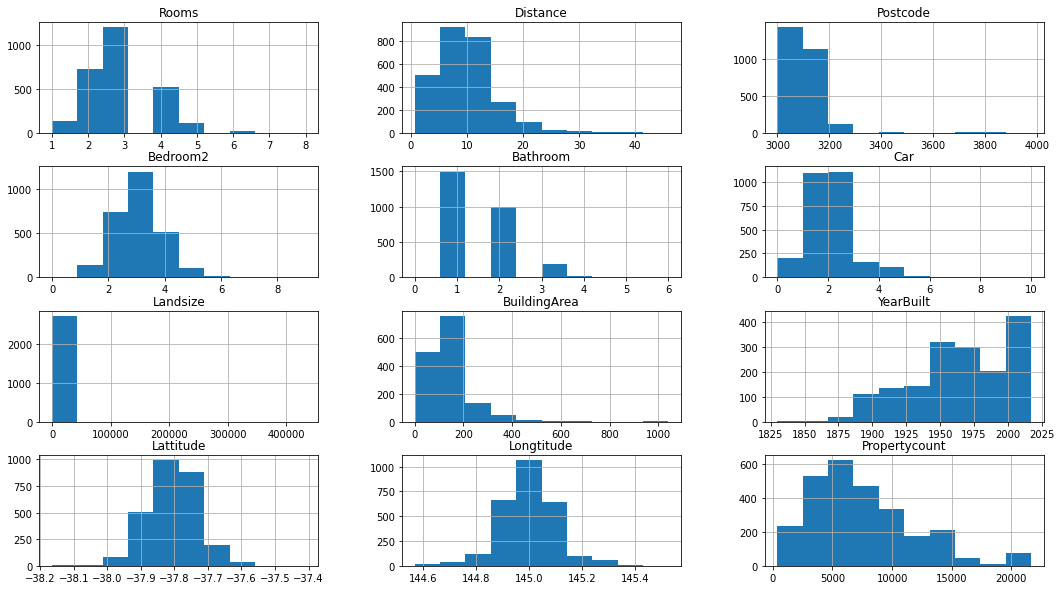

In [ ]:
X_test.hist(figsize=(18, 10));

Далее предобрабатывать мы будем только тренировочные данные (X_train). После того, как предобработаем X_train и обучим модели, предобработаем и X_test.

Нельзя исследовать предобработку данных сразу на X_train и X_test, во избежание использования любой, даже косвенной информации из X_test во время решения, как предобработать X_train.

## Предобработка признаков:

### Работа с пропусками

Прежде чем обучать сеть и обрабатывать признаки, нужно заполнить пропуски в столбцах. Никакой (почти) алгоритм машинного обучения не умеет работать с данными с пропусками. 

Посмотрим, в каких столбцах есть пропуски:

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 1913 to 8709
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10818 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   5677 non-null   float64
 14  YearBuilt      6553 non-null   float64
 15  CouncilArea    9782 non-null   object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

Видим, что пропуски есть в столбцах Car, BuildingArea, YearBuilt, CouncilArea.

#### Заполнение константным значением

Есть разные стратегии заполнения пропусков в данных. Самая простая: заполнить все пропуски в столбце одним и тем же значением.

Это значение может быть разным в зависимости от типа столбца и от ваших знаний о том, что за информация содержится в столбце. Иногда логично заполнить пропуски в числовом столбце нулями, а иногда — средним значением по столбцу.

Если никаких особых идей по заполнению пропусков нет, то у числовых переменных пропуски чаще всего заполняются медианным значением по столбцу, а у категориальных переменных — самым часто встречающимся значением по столбцу.

Для числовых признаков берется медиана (median), а не среднее (mean), потому что медиана меньше подвержена выбросам. Подумайте, какой средний и медианный возраст получится по столбцу "возраст" в данных, если у одного из людей в датасете в поле "возраст" стоит число 100000? Какое значение — mean или median — ближе отражает реальный "средний" возраст людей в датасете?

Для заполнения пропусков в столбцах одним значением используется метод библиотеки pandas filna() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
# Car, BuildingArea и YearBuilt — числовые признаки, поэтому заполняем пропуски медианами по столбцам
X_train['Car'] = X_train['Car'].fillna(X_train['Car'].median())
X_train['BuildingArea'] = X_train['BuildingArea'].fillna(X_train['BuildingArea'].median())
X_train['YearBuilt'] = X_train['YearBuilt'].fillna(X_train['YearBuilt'].median())

# CouncilArea — категориальный признак, поэтому заполним наны самым часто встречающимся значением по столбцу

most_frequent_value = X_train['CouncilArea'].value_counts().index[0] # получаем самое часто встречающееся значение признака CouncilArea
# заполняем наны в столбце CouncilArea полученным значением
X_train['CouncilArea'] = X_train['CouncilArea'].fillna(most_frequent_value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

#### KNNImputer

Второй вариант заполнения пропусков в данных — построение KNN моделей.

В чем суть: пусть у вас есть пропуски в колонке Car. Вы обучаете KNN на всем тренировочном датасете, но в качестве целевой переменной у вас Car. Обучаете, понятное дело, на тех строках, где в колонке Car значения не пропущены. Потом для всех строк, в которых в колонке Car значения пропущены, получаете предсказания KNN, и этими предсказаниями и заполняете пропуски. 

По сути, вы заполняете пропуски в строках, основываясь на значениях в колонке Car в тех строках, которые сильнее всего похожи на вашу строку с пропущенным значением. 

Есть хорошая новость: вам не нужно самому строить KNN, чтобы реализовать идею выше. В Sklearn есть KNNImputer, который сделает все за вас. При этом KNNImputer сразу заполнит пропуски во всех колонках ваших данных, в которых есть пропущенные значения, не нужно возиться с каждой колонкой отдельно.

**Важно!** KNNImputer работает только если в данных нет категориальных колонок. К сожалению, ни одна модель машинного обучения из Sklearn не умеет работать с данными, в которых есть категориальные признаки. 

Если в ваших данных нет категориальных признаков, то заполнить пропуски с помощью KNNImputer можно так:

In [ ]:
# заводим KNNImputer. Его же вы будете использовать для заполнения пропусков в тестовых данных
imputer = KNNImputer(n_neighbors=5)
# Обучаем KNNImputer на X_train
imputer.fit(X_train)
# Получаем новый new_X_train — данные как X_train, только без пропусков
new_X_train = imputer.transform(X_train)

Проверим, что в данных не осталось пропусков:

In [ ]:
X_train.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

Если везде выше False, то пропусков не осталось!

Посмотрим на наши тренировочные данные:

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1913,Coburg,10 Shackell St,3,h,S,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,Northern Metropolitan,11204.0
12104,North Melbourne,18/375 Abbotsford St,3,u,S,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,Northern Metropolitan,6821.0
8518,Williamstown,6 Caspian Tce,4,h,SP,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,Western Metropolitan,6380.0
127,Alphington,2/5 Yarana Rd,2,u,S,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,Northern Metropolitan,2211.0
12948,Craigieburn,32 Viewside Cr,4,h,S,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,Northern Metropolitan,15510.0


### Категориальные признаки

Сначала предобработаем категориальные признаки. Посмотрим, какие столбцы датасета — категориальные.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 1913 to 8709
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Method         10864 non-null  object 
 5   SellerG        10864 non-null  object 
 6   Date           10864 non-null  object 
 7   Distance       10864 non-null  float64
 8   Postcode       10864 non-null  float64
 9   Bedroom2       10864 non-null  float64
 10  Bathroom       10864 non-null  float64
 11  Car            10864 non-null  float64
 12  Landsize       10864 non-null  float64
 13  BuildingArea   10864 non-null  float64
 14  YearBuilt      10864 non-null  float64
 15  CouncilArea    10864 non-null  object 
 16  Lattitude      10864 non-null  float64
 17  Longtitude     10864 non-null  float64
 18  Regi

Категориальные — те признаки, у которых Dtype=object. На самом деле, и в числовых признаках могут скрываться категориальные, но об этом мы поговорим позже. Первичная задача — предобработать признаки, у которых Dtype=object.

#### 1 способ: замена значений в столбце на числа

Занумеровать уникальные значения в столбце и заменить каждое значение на его номер. 

Пример: в столбце Suburb есть значения:

Reservoir  $\ \ \ \ \ \ \ \ $        1         
Richmond     $\ \ \ \ \ \ \ $      2 \\
Bentleigh East   $\  $  3 \\
...

Занумеровать значения в столбце можно двумя спосбами. 

1 способ: Руками:

In [ ]:
from collections import defaultdict
# создаем словарь {'Reservoir' : 1, 'Richmond' : 2, ...}
dict_ = defaultdict(int)
for i, x in enumerate(np.unique(X_train.Suburb)):
    dict_[x] = i+1

In [ ]:
# к каждому значению в колонке Suburb применяем функцию, которая ставит этому значению в соответствие число из dict_
# про lambda-функции подробнее можно узнать тут: https://pythonru.com/osnovy/vse-chto-nuzhno-znat-o-lambda-funkcijah-v-python
X_train['Suburb'] = X_train['Suburb'].apply(lambda x: dict_[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Проверим, что получилось:

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1913,80,10 Shackell St,3,h,S,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,Northern Metropolitan,11204.0
12104,213,18/375 Abbotsford St,3,u,S,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,Northern Metropolitan,6821.0
8518,299,6 Caspian Tce,4,h,SP,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,Western Metropolitan,6380.0
127,7,2/5 Yarana Rd,2,u,S,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,Northern Metropolitan,2211.0
12948,84,32 Viewside Cr,4,h,S,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,Northern Metropolitan,15510.0


Видим, что колонка Suburb стала числовой, как и ожидалось.

**2 способ**, как можно перевести все значения в столбце в числа: использовать LabelEncoder из Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

Так как колонку Suburb мы перевели в числа выше, давайте LabelEncoder применим к другому категориальному признаку: SellerG

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# заводим LabelEncoder. Его же вы будете использовать для предобработки признака Method в тестовых данных
le = LabelEncoder()
# передаем le в fit нашу колонку, чтобы LabelEncoder занумеровал значения в ней
le.fit(X_train['Method'])

LabelEncoder()

Посмотрим, какие уникальные значения в колонках нашел LabelEncoder:

In [ ]:
le.classes_

array(['PI', 'S', 'SA', 'SP', 'VB'], dtype=object)

LabelEncoder занумеровал значения ровно в том порядке, в котором мы видим их выше. Вместо @Realty будет 0, вместо ASL — 1 и т.д.

Переведем теперь с помощью le нашу колонку SellerG в числа:

In [ ]:
X_train['Method'] = le.transform(X_train['Method'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


И посмотрим, что получилось:

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1913,80,10 Shackell St,3,h,1,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,Northern Metropolitan,11204.0
12104,213,18/375 Abbotsford St,3,u,1,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,Northern Metropolitan,6821.0
8518,299,6 Caspian Tce,4,h,3,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,Western Metropolitan,6380.0
127,7,2/5 Yarana Rd,2,u,1,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,Northern Metropolitan,2211.0
12948,84,32 Viewside Cr,4,h,1,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,Northern Metropolitan,15510.0


Видим, что колонка SellerG теперь тоже числовая.

#### 2 способ: бинаризация

Второй способ обработать категориальные признаки — бинаризация. При бинаризации из одного столбца с несколькими категориальными значениями получается несколько новых бинарных столбцов, значения в которых — 0 и 1.

Пример: Пусть у нас в данных есть категориальный признак Education, и в нем три уникальных значения — 'high school', 'university' и 'PhD'. При бинаризации вместо колонки Education появится три новые колонки: Education_high_school, Education_university и Education_phd. В колонке Education_high_school будут единицы в тех строках, в которых в колонке Education было значение 'high school', а в остальных строках будут 0. Аналогично для двух других колонок.

Бинаризовать колонки можно с помощью метода get_dummies библиотеки pandas: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Давайте бинаризуем колонку Regionname. Вот что получится из одной колонки после бинаризации. Получится 8 новых колонок, т.к. в Regionname было 8 уникальных значений.

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1913,80,10 Shackell St,3,h,1,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,Northern Metropolitan,11204.0
12104,213,18/375 Abbotsford St,3,u,1,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,Northern Metropolitan,6821.0
8518,299,6 Caspian Tce,4,h,3,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,Western Metropolitan,6380.0
127,7,2/5 Yarana Rd,2,u,1,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,Northern Metropolitan,2211.0
12948,84,32 Viewside Cr,4,h,1,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,Northern Metropolitan,15510.0


In [ ]:
np.unique(X_train['Regionname'])

array(['Eastern Metropolitan', 'Eastern Victoria',
       'Northern Metropolitan', 'Northern Victoria',
       'South-Eastern Metropolitan', 'Southern Metropolitan',
       'Western Metropolitan', 'Western Victoria'], dtype=object)

In [ ]:
pd.get_dummies(X_train['Regionname'])

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
1913,0,0,1,0,0,0,0,0
12104,0,0,1,0,0,0,0,0
8518,0,0,0,0,0,0,1,0
127,0,0,1,0,0,0,0,0
12948,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3974,0,0,0,0,0,0,1,0
9034,0,0,0,0,0,1,0,0
6983,0,0,0,0,0,1,0,0
9167,0,0,1,0,0,0,0,0


Чтобы заменить колонку Regionname на эти 8 новых колонок в X_train, нужно передать get_dummies весть X_train и указать список колонок, которые нужно бинаризовать:

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Regionname'])

Посмотрим, что получилось:

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1913,80,10 Shackell St,3,h,1,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,11204.0,0,0,1,0,0,0,0,0
12104,213,18/375 Abbotsford St,3,u,1,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,6821.0,0,0,1,0,0,0,0,0
8518,299,6 Caspian Tce,4,h,3,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,6380.0,0,0,0,0,0,0,1,0
127,7,2/5 Yarana Rd,2,u,1,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,2211.0,0,0,1,0,0,0,0,0
12948,84,32 Viewside Cr,4,h,1,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,15510.0,0,0,1,0,0,0,0,0


Видим, что колонка Regionname исчезла, и появились новые 8 колонок. 

Применим тот же подход к столбцу Type:

In [ ]:
X_train = pd.get_dummies(X_train, columns=['Type'])

In [ ]:
X_train.head()

,Suburb,Address,Rooms,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
1913,80,10 Shackell St,3,1,Nelson,3/09/2016,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,Moreland,-37.74270,144.95200,11204.0,0,0,1,0,0,0,0,0,1,0,0
12104,213,18/375 Abbotsford St,3,1,JMRE,29/07/2017,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,Melbourne,-37.79773,144.94611,6821.0,0,0,1,0,0,0,0,0,0,0,1
8518,299,6 Caspian Tce,4,3,Village,29/04/2017,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,Hobsons Bay,-37.85660,144.87370,6380.0,0,0,0,0,0,0,1,0,1,0,0
127,7,2/5 Yarana Rd,2,1,McGrath,12/11/2016,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,Darebin,-37.77730,145.03140,2211.0,0,0,1,0,0,0,0,0,0,0,1
12948,84,32 Viewside Cr,4,1,Ray,19/08/2017,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,Boroondara,-37.57565,144.91365,15510.0,0,0,1,0,0,0,0,0,1,0,0


### Удаление признаков

Иногда признаки из датасета можно удалять. Это бывает нужно в двух случаях:
- когда признак не несет никакой полезной информации. Примеры таких признаков: номер паспорта клиента (от номера паспорта не зависит, например, насколько надежным заемщиком является клиент), какой вид смузи предпочитает клиент и среднегодичная погода в городе, где живет человек
- когда признак может нести полезную информацию, но его сложно предобработать. И для создания базовой модели (бейзлайна) этот признак проще удалить. И после, в процессе улучшения предобработки признаков, можно будет добавить этот признак обратно. Пример такого признака: время, в которое клиент совершил покупку на сайте или признак Address из нашего датасета

Давайте удалим из нашего датасета признаки Address, Date и CouncilArea. Позже вы можете сами добавить информацию из этих признаков в датасет и попробовать обучить модель машинного обучения с ними.

In [ ]:
X_train = X_train.drop(columns = ['Address', 'Date', 'CouncilArea', 'SellerG'])

In [ ]:
X_train.head()

,Suburb,Rooms,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_h,Type_t,Type_u
1913,80,3,1,7.8,3058.0,2.0,1.0,1.0,286.0,110.0,1890.0,-37.74270,144.95200,11204.0,0,0,1,0,0,0,0,0,1,0,0
12104,213,3,1,1.8,3051.0,3.0,1.0,1.0,1843.0,126.0,1960.0,-37.79773,144.94611,6821.0,0,0,1,0,0,0,0,0,0,0,1
8518,299,4,3,8.0,3016.0,4.0,3.0,2.0,183.0,191.0,2006.0,-37.85660,144.87370,6380.0,0,0,0,0,0,0,1,0,1,0,0
127,7,2,1,6.4,3078.0,2.0,1.0,1.0,0.0,126.0,1970.0,-37.77730,145.03140,2211.0,0,0,1,0,0,0,0,0,0,0,1
12948,84,4,1,20.6,3064.0,4.0,2.0,2.0,448.0,126.0,1970.0,-37.57565,144.91365,15510.0,0,0,1,0,0,0,0,0,1,0,0


Вот и все. Давайте убедимся, что в нашем датасете не осталось ни пропусков, ни категориальных признаков:

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10864 entries, 1913 to 8709
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 10864 non-null  int64  
 1   Rooms                                  10864 non-null  int64  
 2   Method                                 10864 non-null  int64  
 3   Distance                               10864 non-null  float64
 4   Postcode                               10864 non-null  float64
 5   Bedroom2                               10864 non-null  float64
 6   Bathroom                               10864 non-null  float64
 7   Car                                    10864 non-null  float64
 8   Landsize                               10864 non-null  float64
 9   BuildingArea                           10864 non-null  float64
 10  YearBuilt                              10864 non-null  float64
 11  

Отлично! Теперь можно обучать на этом датасете модели машинного обучения =)

## Обучение моделей

Наща задача — задача регрессии. Для ее решения мы будем использовать такие модели машинного обучения, как линейная регрессия и случайный лес.

### Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=7)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Мы обучили модели машинного обучения на тренировочных данных. Чтобы можно было тестировать эти модели на тестовых данных, тестовые данные нужно сначала предобработать точно так же, как тренировочные. 

## Подготовка тестовых данных

In [ ]:
X_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7010,Hawthorn East,4/43 Clifton Rd,2,u,S,hockingstuart,22/08/2016,7.5,3123.0,2.0,1.0,1.0,172.0,90.0,1960.0,Boroondara,-37.84370,145.05360,Southern Metropolitan,6482.0
3806,Malvern,50 Hunter St,4,h,S,Marshall,25/02/2017,7.4,3144.0,4.0,3.0,2.0,585.0,248.0,1915.0,Stonnington,-37.86800,145.03800,Southern Metropolitan,4675.0
9812,Brunswick,40 Blair St,2,h,VB,Nelson,24/06/2017,5.2,3056.0,2.0,1.0,0.0,191.0,NaN,NaN,Moreland,-37.77012,144.96476,Northern Metropolitan,11918.0
998,Box Hill,3/8 Ashted Rd,2,u,S,Philip,19/11/2016,13.1,3128.0,2.0,1.0,1.0,151.0,82.0,1970.0,Whitehorse,-37.82340,145.12350,Eastern Metropolitan,4605.0
12250,Bundoora,1188 Plenty Rd,3,h,SP,Stockdale,3/09/2017,12.1,3083.0,3.0,1.0,1.0,541.0,120.0,1960.0,NaN,-37.70603,145.05423,Northern Metropolitan,10175.0


Ниже в ячейках производится предобработка тестовых данных. Она точно такая же, как для тренировочных: пропуски в колонках заменяются теми же значениями, какими они заменялись в тренировочных данных, категориальные признаки предобрабатываются теми же способоами, какими они обрабатывались в тренировочной части данных.

In [ ]:
# Car, BuildingArea и YearBuilt — числовые признаки, поэтому заполняем пропуски медианами по столбцам
X_test['Car'] = X_test['Car'].fillna(X_train['Car'].median())
X_test['BuildingArea'] = X_test['BuildingArea'].fillna(X_train['BuildingArea'].median())
X_test['YearBuilt'] = X_test['YearBuilt'].fillna(X_train['YearBuilt'].median())

# CouncilArea — категориальный признак, поэтому заполним наны самым часто встречающимся значением по столбцу

# заполняем наны в столбце CouncilArea полученным значением
X_test['CouncilArea'] = X_test['CouncilArea'].fillna(most_frequent_value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
X_test['Suburb'] = X_test['Suburb'].apply(lambda x: dict_[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test['Method'] = le.transform(X_test['Method'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test = pd.get_dummies(X_test, columns=['Regionname', 'Type'])

In [ ]:
X_test = X_test.drop(columns = ['Address', 'Date', 'CouncilArea', 'SellerG'])

## Получение предсказаний на тестовом датасете

Теперь мы готовы подать тестовые данные на вход обученным моделям и получить предсказания:

In [ ]:
y_predicted_linreg = lr.predict(X_test)

In [ ]:
y_predicted_linreg[:10]

array([ 810005.76418291, 2219648.8128207 ,  882898.78741448,
        399063.64603299,  838286.87875476, 2066842.66698027,
         49625.03667176, 2049499.87933287, 1531154.53277078,
       1992508.6022613 ])

In [ ]:
np.array(y_test)[:10]

array([ 706000., 3470000.,  900000.,  636000.,  715000., 1565000.,
        185000., 2000000., 2350000., 2900000.])

In [ ]:
y_predicted_rf = rf.predict(X_test)

In [ ]:
y_predicted_rf[:10]

array([ 670625.75287886, 2283503.96283337,  922294.73244047,
        663677.08401593,  651500.61760549, 1824368.30732376,
        253591.27478753, 1415986.51220637, 1288285.54853192,
       1972244.63525818])

In [ ]:
np.array(y_test)[:10]

array([ 706000., 3470000.,  900000.,  636000.,  715000., 1565000.,
        185000., 2000000., 2350000., 2900000.])

## Метрики качества

Эта задача — задача регрессии, поэтому мы будем вычислять метрики регрессии. Вычислим [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) и [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(y_predicted_linreg, y_test)

264427.448641244

In [ ]:
mean_squared_error(y_predicted_linreg, y_test)

154800574636.89548

In [ ]:
mean_absolute_error(y_predicted_rf, y_test)

198758.8021023104

In [ ]:
mean_squared_error(y_predicted_rf, y_test)

96339170572.79895

Видим, что Random Forest справляется с задачей чуть лучше, чем линейная регрессия.

Вот и все, мы прошли путь от загрузки данных, их предобработки, обучения модели и получения предсказаний. 

## Допглавы предобработки признаков

### Генерация новых признаков

При предобработке датасета часто полезно не только обрабатывать существующие признаки, но и добавлять новые признаки и удалять ненужные. 

Не существует универсального алгоритма, какие признаки нужно удалить, и каким образом сгенерировать новые признаки. То, удалять признак или нет, и как получать новые признаки, зависит от вашего понимания данных. Если вы понимаете, что какой-то признак не несет много смысла и может только запутать модель — удаляйте. А если вам кажется, что новый признак, добавленный в датасет, поможет модели — добавляйте.

Примеры удаления и добавления признаков:

- **пример #1**. Допустим, вы решаете задачу кредитного скоринга: учите модель по информации о человеке понимать, дать человеку кредит или нет. Среди признаков в вашем датасете есть признаки "имя человека" и "количество домашних питомцев". Кажется, что эти признаки можно (и даже лучше) удалить из датасета, потому что они не имеют никакого отношения к тому, насколько вероятно человек вернет кредит. И модели эти признаки принять решение никак не помогут.

- **пример #2**. Допустим, вы решаете задачу предсказания сердечно-сосудистых заболеваний (ССЗ). И в вашем датасете есть признаки "рост" и "вес". Из этих двух признаков можно составить третий — ИМТ (индекс массы тела), который равен $\frac{Вес/2.205}{Рост^2/39.37^2}$. Возможно, с этим признаком в датасете модели будет проще вывести зависимость между параметрами человека и наличием у него ССЗ.

Часто не сразу понятно, будет ли тот или иной признак полезен модели при обучении. Например, сходу до конца неясно, будет ли признак ИМТ действительно полезен модели для предсказания ССЗ. Поэтому нужно ставить эксперименты: обучать и тестировать модель с и без признака, и смотреть, как модель ведет себя лучше. У вас может быть очень много идей разных признаков и очень много экспериментов. И это нормально: вспомните, дата саентист тратить больше 50% своего времени на обработку данных. 

Несмотря на то, что часто мы генерируем признаки, исходя из нашего понимания задачи и природы данных, некоторые автоматические методы генерации признаков все же существуют. 

В библитеке **sklearn** есть модуль preprocessing, в котором собраны методы для предобработки данных, в том числе и для генерации новых признаков. Со всеми методами этого модуля можете познакомиться в документации по ссылке: http://scikit-learn.org/stable/modules/preprocessing.html
А здесь мы рассмотрим один метод генерации новых признаков: класс **PolynomialFeatures**

**PolynomialFeatures** — метод, который принимает на вход **числовые** признаки и генерирует на их основе всевозможные полиномы из этих признаков до определенной степени (степень задается параметром degree). 
Например, если у нас в датасете есть два признака: $x$, $y$, и мы генерируем на их основе полиномиальные признаки до степени 2, то в результате получим 6 признаков: 

1 (колонка из всех единиц), $x$, $y$, $x^2$, $y^2$, $xy$. 

Если степень = 3, то получим уже 10 признаков: 

1, $x$, $y$, $x^2$, $y^2$, $xy$, $x^3$, $y^3$, $x^2y$, $xy^2$.

Давайте посмотрим, как это работает:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False) # include_bias=False исключает колонку из всех единиц в полученном результате

Чтобы не плодить очень много признаков, давайте возьмем из нашего датасета два признака и получим из них полиномиальные признаки до степени 3:

In [ ]:
X_train_slice = X_train[['Rooms', 'Bathroom']]
X_train_slice.head()

In [ ]:
poly.fit(X_train_slice )

Полученный результат:

видим, что получили 9 признаков (без колонки из всех единиц)

In [ ]:
pd.DataFrame(poly.transform(X_train_slice)).head()

После получения полиномиальных признаков их можно добавить к оставшимся признаками датасета и обучать модель. Но в таком виде модель вряд ли обучится хорошо: признаков стало слишком много. Поэтому после генерации полиномиальных признаков прежде чем обучать модель нужно отобрать из них самые удачные, т.е. те, которые дают больше всего пользы для обучения модели. 

Сделать это можно разными способами, но самый простой — обучить на этих признаках какую-нибудь простую модель (например, линейную или логистическую регрессию), посмотреть на важность каждого из полиномиальных признаков для обученной модели и оставить несколько самых важных. И уже на этих оставленных признаках обучать более сложную модель. 

### Скелинг и нормализация признаков

Кроме удаления коррелирующих признаков для некоторых линейных моделей важна нормализация признаков. 

Что это такое на примере: давайте рассмотрим признаки "возраст" и "зарплата" в датасете. Признак "возраст" может варьироваться от 0 до 100 (условно), признак "зарплата" — от 0 до 500000 (также условно). Получается, что у этих двух признаков бывают очень разные по модулю значения. 

Для некоторых моделей: деревьев, обычных линейных моделей и кнн, эта особенность неважна. Но есть модели, которые страдают от того, что признаки в датасете могут сильно отличаться по модулю. Это линейные модели с регуляризацией: Lasso и Ridge. 

Привести признаки в вид, когда они будут варьироваться примерно в одном диапазоне, просто. Достаточно просто взять самое большое по модулю значение признака и поделить весь столбец признака на это значение. Тогда признаки будут варьироваться от -1 до 1. Но такой подход не всегда оптимален. Например, если в признаке "зарплата" почти у всех людей зарплата варьируется от 0 до 100, а у 10% людей зарплата составляет >100000, то при делении всего столбца зарплаты на 100000, зарплата 90% датасета превратится практически в ноль. 

В библиотеке sklearn есть несколько методов для скэлирования данных: StandardScaler, MinMaxScaler, RobustScaler и т.д. Найти их все и почитать о них можно в том же модуле preprocessing: https://scikit-learn.org/stable/modules/preprocessing.html

Давайте посмотрим, как их использовать, на примере RobustScaler:

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
scaler = RobustScaler()
# скэлируем только часть признаков датасета. Скэлировать можно только числовые признаки!!
scaler.fit(X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1))

In [ ]:
scaled_data = scaler.transform(X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1))
scaled_data = pd.DataFrame(scaled_data, columns = X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1).columns).head()

Итак, посомтрим, как выглядели столбцы до применения скелера:

In [ ]:
X_train.drop(['Address', 'Date', 'Type',	'Method', 'CouncilArea', 'Regionname'], axis=1).head()

И как выглядят после:

In [ ]:
scaled_data.head()

Видим, что значения по модулю в столбцах изменились, вариабельности выровнялись.